In [42]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
%matplotlib inline

In [3]:
regex= re.compile(r'\d+')

In [4]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [5]:
model_names = os.listdir(saved_models)

In [6]:
model_names

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_50epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',


In [63]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [59]:
f_list_075, epochs = get_fnames(75, prefix='predicted_unseen')

In [60]:
f_list_075[20:]

array(['predicted_unseen_6positions_110epochs_0.75coeff.npz',
       'predicted_unseen_6positions_120epochs_0.75coeff.npz',
       'predicted_unseen_6positions_130epochs_0.75coeff.npz',
       'predicted_unseen_6positions_140epochs_0.75coeff.npz',
       'predicted_unseen_6positions_150epochs_0.75coeff.npz',
       'predicted_unseen_6positions_160epochs_0.75coeff.npz',
       'predicted_unseen_6positions_170epochs_0.75coeff.npz',
       'predicted_unseen_6positions_180epochs_0.75coeff.npz',
       'predicted_unseen_6positions_190epochs_0.75coeff.npz',
       'predicted_unseen_6positions_200epochs_0.75coeff.npz',
       'predicted_unseen_6positions_210epochs_0.75coeff.npz',
       'predicted_unseen_6positions_220epochs_0.75coeff.npz',
       'predicted_unseen_6positions_230epochs_0.75coeff.npz',
       'predicted_unseen_6positions_240epochs_0.75coeff.npz',
       'predicted_unseen_6positions_250epochs_0.75coeff.npz'],
      dtype='<U51')

In [66]:
def mse_vs_epochs(coeff, prefix):
    mse = []
    epchs = []
    f_list, epochs = get_fnames(coeff, prefix)
    for fname, e in zip(f_list, epochs):
        print(fname, e)
        data = np.load(os.path.join(saved_models, fname))
        y_true, y_pred = data['true'], data['pred']
        error = mean_squared_error(y_true, y_pred)
        
        epchs.append(e)
        mse.append(error)
    plt.plot(epchs, mse)
    return mse, epchs

predicted_unseen_6positions_5epochs_0.75coeff.npz 5
predicted_unseen_6positions_10epochs_0.75coeff.npz 10
predicted_unseen_6positions_15epochs_0.75coeff.npz 15
predicted_unseen_6positions_20epochs_0.75coeff.npz 20
predicted_unseen_6positions_25epochs_0.75coeff.npz 25
predicted_unseen_6positions_30epochs_0.75coeff.npz 30
predicted_unseen_6positions_35epochs_0.75coeff.npz 35
predicted_unseen_6positions_40epochs_0.75coeff.npz 40
predicted_unseen_6positions_45epochs_0.75coeff.npz 45
predicted_unseen_6positions_50epochs_0.75coeff.npz 50
predicted_unseen_6positions_55epochs_0.75coeff.npz 55
predicted_unseen_6positions_60epochs_0.75coeff.npz 60
predicted_unseen_6positions_65epochs_0.75coeff.npz 65
predicted_unseen_6positions_70epochs_0.75coeff.npz 70
predicted_unseen_6positions_75epochs_0.75coeff.npz 75
predicted_unseen_6positions_80epochs_0.75coeff.npz 80
predicted_unseen_6positions_85epochs_0.75coeff.npz 85
predicted_unseen_6positions_90epochs_0.75coeff.npz 90
predicted_unseen_6positions_95

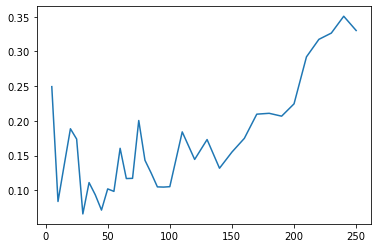

In [67]:
mse_075_unseen, epochs_075 = mse_vs_epochs(75, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.7coeff.npz 5
predicted_unseen_6positions_10epochs_0.7coeff.npz 10
predicted_unseen_6positions_15epochs_0.7coeff.npz 15
predicted_unseen_6positions_20epochs_0.7coeff.npz 20
predicted_unseen_6positions_25epochs_0.7coeff.npz 25
predicted_unseen_6positions_30epochs_0.7coeff.npz 30
predicted_unseen_6positions_35epochs_0.7coeff.npz 35
predicted_unseen_6positions_40epochs_0.7coeff.npz 40
predicted_unseen_6positions_45epochs_0.7coeff.npz 45
predicted_unseen_6positions_50epochs_0.7coeff.npz 50
predicted_unseen_6positions_55epochs_0.7coeff.npz 55
predicted_unseen_6positions_60epochs_0.7coeff.npz 60
predicted_unseen_6positions_65epochs_0.7coeff.npz 65
predicted_unseen_6positions_70epochs_0.7coeff.npz 70
predicted_unseen_6positions_75epochs_0.7coeff.npz 75
predicted_unseen_6positions_80epochs_0.7coeff.npz 80
predicted_unseen_6positions_85epochs_0.7coeff.npz 85
predicted_unseen_6positions_90epochs_0.7coeff.npz 90
predicted_unseen_6positions_95epochs_0.7coeff.np

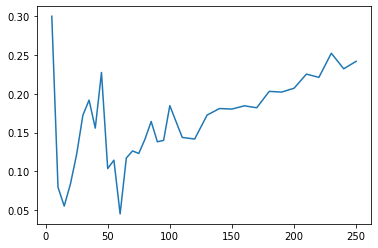

In [68]:
mse_070_unseen, epochs_070 = mse_vs_epochs(7,prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.6coeff.npz 5
predicted_unseen_6positions_10epochs_0.6coeff.npz 10
predicted_unseen_6positions_15epochs_0.6coeff.npz 15
predicted_unseen_6positions_20epochs_0.6coeff.npz 20
predicted_unseen_6positions_25epochs_0.6coeff.npz 25
predicted_unseen_6positions_30epochs_0.6coeff.npz 30
predicted_unseen_6positions_35epochs_0.6coeff.npz 35
predicted_unseen_6positions_40epochs_0.6coeff.npz 40
predicted_unseen_6positions_45epochs_0.6coeff.npz 45
predicted_unseen_6positions_50epochs_0.6coeff.npz 50
predicted_unseen_6positions_55epochs_0.6coeff.npz 55
predicted_unseen_6positions_60epochs_0.6coeff.npz 60
predicted_unseen_6positions_65epochs_0.6coeff.npz 65
predicted_unseen_6positions_70epochs_0.6coeff.npz 70
predicted_unseen_6positions_75epochs_0.6coeff.npz 75
predicted_unseen_6positions_80epochs_0.6coeff.npz 80
predicted_unseen_6positions_85epochs_0.6coeff.npz 85
predicted_unseen_6positions_90epochs_0.6coeff.npz 90
predicted_unseen_6positions_95epochs_0.6coeff.np

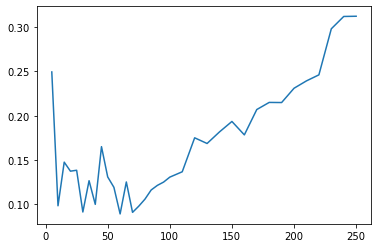

In [69]:
mse_060_unseen, epochs_060 = mse_vs_epochs(6,prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.5coeff.npz 5
predicted_unseen_6positions_10epochs_0.5coeff.npz 10
predicted_unseen_6positions_15epochs_0.5coeff.npz 15
predicted_unseen_6positions_20epochs_0.5coeff.npz 20
predicted_unseen_6positions_25epochs_0.5coeff.npz 25
predicted_unseen_6positions_30epochs_0.5coeff.npz 30
predicted_unseen_6positions_35epochs_0.5coeff.npz 35
predicted_unseen_6positions_40epochs_0.5coeff.npz 40
predicted_unseen_6positions_45epochs_0.5coeff.npz 45
predicted_unseen_6positions_50epochs_0.5coeff.npz 50
predicted_unseen_6positions_55epochs_0.5coeff.npz 55
predicted_unseen_6positions_60epochs_0.5coeff.npz 60
predicted_unseen_6positions_65epochs_0.5coeff.npz 65
predicted_unseen_6positions_70epochs_0.5coeff.npz 70
predicted_unseen_6positions_75epochs_0.5coeff.npz 75
predicted_unseen_6positions_80epochs_0.5coeff.npz 80
predicted_unseen_6positions_85epochs_0.5coeff.npz 85
predicted_unseen_6positions_90epochs_0.5coeff.npz 90
predicted_unseen_6positions_95epochs_0.5coeff.np

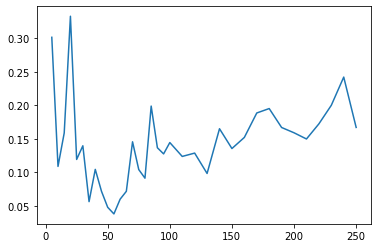

In [70]:
mse_050_unseen, epochs_050 = mse_vs_epochs(5,prefix='predicted_unseen')

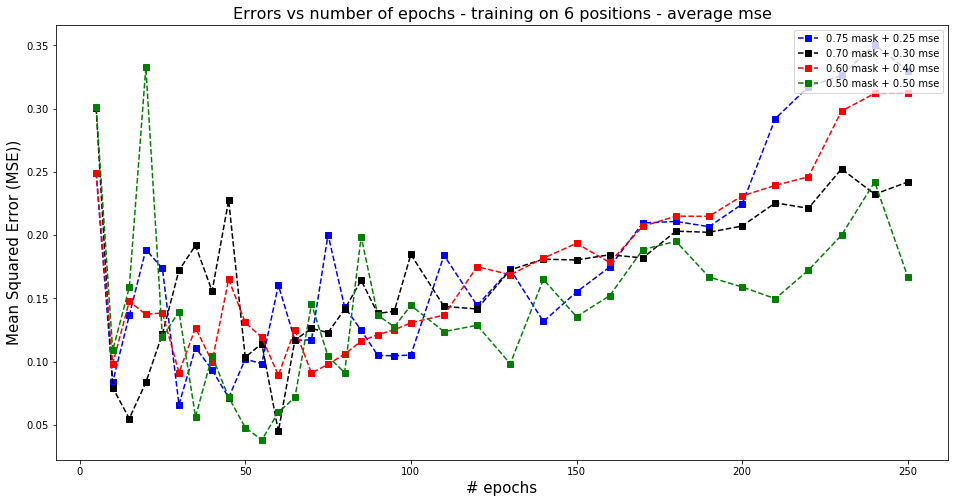

In [71]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_075, mse_075_unseen, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070_unseen,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060_unseen, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs_060, mse_050_unseen, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

predicted_testdata_6positions_5epochs_0.75coeff.npz 5
predicted_testdata_6positions_10epochs_0.75coeff.npz 10
predicted_testdata_6positions_15epochs_0.75coeff.npz 15
predicted_testdata_6positions_20epochs_0.75coeff.npz 20
predicted_testdata_6positions_25epochs_0.75coeff.npz 25
predicted_testdata_6positions_30epochs_0.75coeff.npz 30
predicted_testdata_6positions_35epochs_0.75coeff.npz 35
predicted_testdata_6positions_40epochs_0.75coeff.npz 40
predicted_testdata_6positions_45epochs_0.75coeff.npz 45
predicted_testdata_6positions_50epochs_0.75coeff.npz 50
predicted_testdata_6positions_55epochs_0.75coeff.npz 55
predicted_testdata_6positions_60epochs_0.75coeff.npz 60
predicted_testdata_6positions_65epochs_0.75coeff.npz 65
predicted_testdata_6positions_70epochs_0.75coeff.npz 70
predicted_testdata_6positions_75epochs_0.75coeff.npz 75
predicted_testdata_6positions_80epochs_0.75coeff.npz 80
predicted_testdata_6positions_85epochs_0.75coeff.npz 85
predicted_testdata_6positions_90epochs_0.75coeff.n

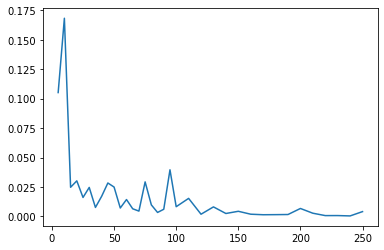

In [72]:
mse_075_test, epochs_075 = mse_vs_epochs(75, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.7coeff.npz 5
predicted_testdata_6positions_10epochs_0.7coeff.npz 10
predicted_testdata_6positions_15epochs_0.7coeff.npz 15
predicted_testdata_6positions_20epochs_0.7coeff.npz 20
predicted_testdata_6positions_25epochs_0.7coeff.npz 25
predicted_testdata_6positions_30epochs_0.7coeff.npz 30
predicted_testdata_6positions_35epochs_0.7coeff.npz 35
predicted_testdata_6positions_40epochs_0.7coeff.npz 40
predicted_testdata_6positions_45epochs_0.7coeff.npz 45
predicted_testdata_6positions_50epochs_0.7coeff.npz 50
predicted_testdata_6positions_55epochs_0.7coeff.npz 55
predicted_testdata_6positions_60epochs_0.7coeff.npz 60
predicted_testdata_6positions_65epochs_0.7coeff.npz 65
predicted_testdata_6positions_70epochs_0.7coeff.npz 70
predicted_testdata_6positions_75epochs_0.7coeff.npz 75
predicted_testdata_6positions_80epochs_0.7coeff.npz 80
predicted_testdata_6positions_85epochs_0.7coeff.npz 85
predicted_testdata_6positions_90epochs_0.7coeff.npz 90
predicted_te

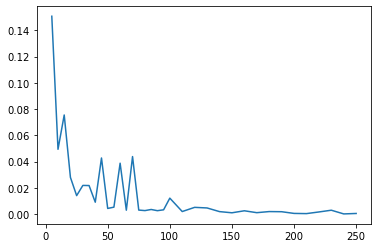

In [73]:
mse_070_test, epochs_070 = mse_vs_epochs(7, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.6coeff.npz 5
predicted_testdata_6positions_10epochs_0.6coeff.npz 10
predicted_testdata_6positions_15epochs_0.6coeff.npz 15
predicted_testdata_6positions_20epochs_0.6coeff.npz 20
predicted_testdata_6positions_25epochs_0.6coeff.npz 25
predicted_testdata_6positions_30epochs_0.6coeff.npz 30
predicted_testdata_6positions_35epochs_0.6coeff.npz 35
predicted_testdata_6positions_40epochs_0.6coeff.npz 40
predicted_testdata_6positions_45epochs_0.6coeff.npz 45
predicted_testdata_6positions_50epochs_0.6coeff.npz 50
predicted_testdata_6positions_55epochs_0.6coeff.npz 55
predicted_testdata_6positions_60epochs_0.6coeff.npz 60
predicted_testdata_6positions_65epochs_0.6coeff.npz 65
predicted_testdata_6positions_70epochs_0.6coeff.npz 70
predicted_testdata_6positions_75epochs_0.6coeff.npz 75
predicted_testdata_6positions_80epochs_0.6coeff.npz 80
predicted_testdata_6positions_85epochs_0.6coeff.npz 85
predicted_testdata_6positions_90epochs_0.6coeff.npz 90
predicted_te

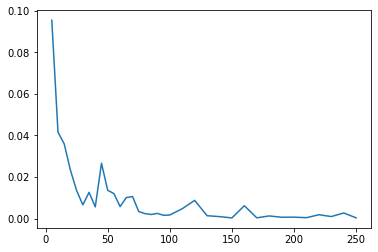

In [74]:
mse_060_test, epochs_060 = mse_vs_epochs(6, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.5coeff.npz 5
predicted_testdata_6positions_10epochs_0.5coeff.npz 10
predicted_testdata_6positions_15epochs_0.5coeff.npz 15
predicted_testdata_6positions_20epochs_0.5coeff.npz 20
predicted_testdata_6positions_25epochs_0.5coeff.npz 25
predicted_testdata_6positions_30epochs_0.5coeff.npz 30
predicted_testdata_6positions_35epochs_0.5coeff.npz 35
predicted_testdata_6positions_40epochs_0.5coeff.npz 40
predicted_testdata_6positions_45epochs_0.5coeff.npz 45
predicted_testdata_6positions_50epochs_0.5coeff.npz 50
predicted_testdata_6positions_55epochs_0.5coeff.npz 55
predicted_testdata_6positions_60epochs_0.5coeff.npz 60
predicted_testdata_6positions_65epochs_0.5coeff.npz 65
predicted_testdata_6positions_70epochs_0.5coeff.npz 70
predicted_testdata_6positions_75epochs_0.5coeff.npz 75
predicted_testdata_6positions_80epochs_0.5coeff.npz 80
predicted_testdata_6positions_85epochs_0.5coeff.npz 85
predicted_testdata_6positions_90epochs_0.5coeff.npz 90
predicted_te

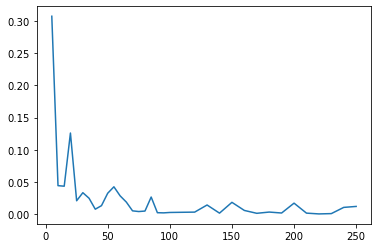

In [75]:
mse_050_test, epochs_050 = mse_vs_epochs(5, prefix='predicted_testdata')

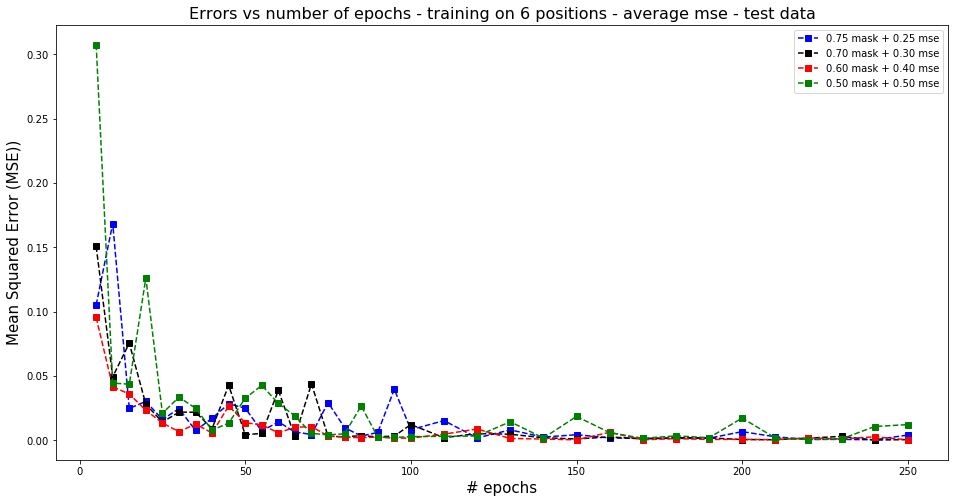

In [76]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse - test data",size=16)
ax1.plot(epochs_075, mse_075_test, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070_test,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060_test, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050, mse_050_test, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

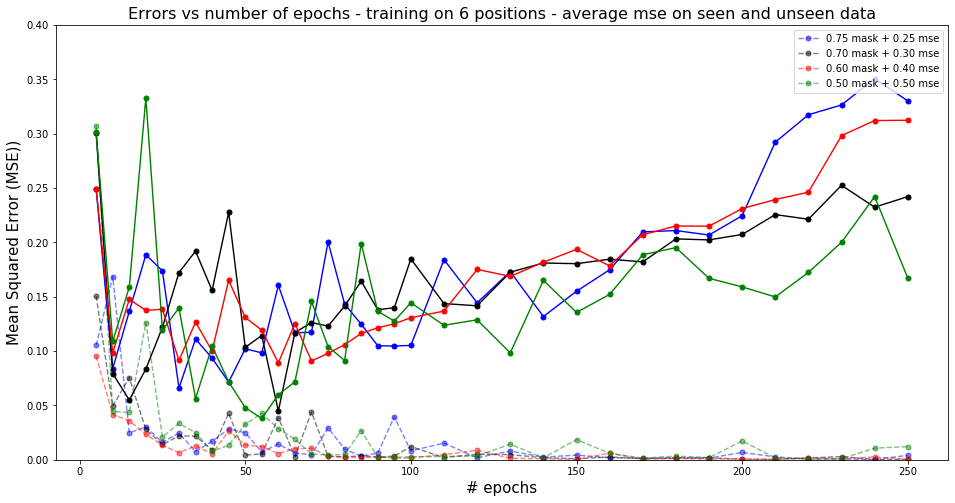

In [77]:
fig1, ax1 = plt.subplots(figsize=(16,8))
marker=5
plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs_075, mse_075_test, 'o--', linewidth=1.4, ms=marker, c='blue',label='0.75 mask + 0.25 mse', alpha=0.5)
ax1.plot(epochs_070, mse_070_test,'o--', linewidth=1.4, ms=marker, c='k', label='0.70 mask + 0.30 mse', alpha=0.5)
ax1.plot(epochs_060, mse_060_test, 'o--', linewidth=1.4, ms=marker, c='red', label='0.60 mask + 0.40 mse', alpha=0.5)
ax1.plot(epochs_050, mse_050_test, 'o--', linewidth=1.4, ms=marker, c='green', label='0.50 mask + 0.50 mse', alpha=0.5)

ax1.plot(epochs_075, mse_075, 'o-', linewidth=1.4, ms=marker, c='blue')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070, mse_070,'o-', linewidth=1.4, ms=marker, c='k')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060, mse_060, 'o-', linewidth=1.4, ms=marker, c='red')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050, mse_050, 'o-', linewidth=1.4, ms=marker, c='green')#, label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
plt.ylim(0., 0.4)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

predicted_testdata_6positions_5epochs_0.25coeff.npz 5
predicted_testdata_6positions_10epochs_0.25coeff.npz 10
predicted_testdata_6positions_15epochs_0.25coeff.npz 15
predicted_testdata_6positions_20epochs_0.25coeff.npz 20
predicted_testdata_6positions_25epochs_0.25coeff.npz 25
predicted_testdata_6positions_30epochs_0.25coeff.npz 30
predicted_testdata_6positions_35epochs_0.25coeff.npz 35
predicted_testdata_6positions_40epochs_0.25coeff.npz 40
predicted_testdata_6positions_45epochs_0.25coeff.npz 45
predicted_testdata_6positions_50epochs_0.25coeff.npz 50
predicted_testdata_6positions_55epochs_0.25coeff.npz 55
predicted_testdata_6positions_60epochs_0.25coeff.npz 60
predicted_testdata_6positions_65epochs_0.25coeff.npz 65
predicted_testdata_6positions_70epochs_0.25coeff.npz 70
predicted_testdata_6positions_75epochs_0.25coeff.npz 75
predicted_testdata_6positions_80epochs_0.25coeff.npz 80
predicted_testdata_6positions_85epochs_0.25coeff.npz 85
predicted_testdata_6positions_90epochs_0.25coeff.n

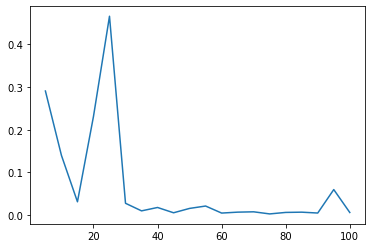

In [78]:
mse_025_test, epochs_025 = mse_vs_epochs(25, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.3coeff.npz 5
predicted_testdata_6positions_10epochs_0.3coeff.npz 10
predicted_testdata_6positions_15epochs_0.3coeff.npz 15
predicted_testdata_6positions_20epochs_0.3coeff.npz 20
predicted_testdata_6positions_25epochs_0.3coeff.npz 25
predicted_testdata_6positions_30epochs_0.3coeff.npz 30
predicted_testdata_6positions_35epochs_0.3coeff.npz 35
predicted_testdata_6positions_40epochs_0.3coeff.npz 40
predicted_testdata_6positions_45epochs_0.3coeff.npz 45
predicted_testdata_6positions_50epochs_0.3coeff.npz 50
predicted_testdata_6positions_55epochs_0.3coeff.npz 55
predicted_testdata_6positions_60epochs_0.3coeff.npz 60
predicted_testdata_6positions_65epochs_0.3coeff.npz 65
predicted_testdata_6positions_70epochs_0.3coeff.npz 70
predicted_testdata_6positions_75epochs_0.3coeff.npz 75
predicted_testdata_6positions_80epochs_0.3coeff.npz 80
predicted_testdata_6positions_85epochs_0.3coeff.npz 85
predicted_testdata_6positions_90epochs_0.3coeff.npz 90
predicted_te

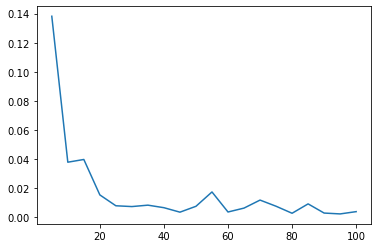

In [79]:
mse_030_test, epochs_030 = mse_vs_epochs(3, prefix='predicted_testdata')

predicted_testdata_6positions_5epochs_0.4coeff.npz 5
predicted_testdata_6positions_10epochs_0.4coeff.npz 10
predicted_testdata_6positions_15epochs_0.4coeff.npz 15
predicted_testdata_6positions_20epochs_0.4coeff.npz 20
predicted_testdata_6positions_25epochs_0.4coeff.npz 25
predicted_testdata_6positions_30epochs_0.4coeff.npz 30
predicted_testdata_6positions_35epochs_0.4coeff.npz 35
predicted_testdata_6positions_40epochs_0.4coeff.npz 40
predicted_testdata_6positions_45epochs_0.4coeff.npz 45
predicted_testdata_6positions_50epochs_0.4coeff.npz 50
predicted_testdata_6positions_55epochs_0.4coeff.npz 55
predicted_testdata_6positions_60epochs_0.4coeff.npz 60
predicted_testdata_6positions_65epochs_0.4coeff.npz 65
predicted_testdata_6positions_70epochs_0.4coeff.npz 70
predicted_testdata_6positions_75epochs_0.4coeff.npz 75
predicted_testdata_6positions_80epochs_0.4coeff.npz 80
predicted_testdata_6positions_85epochs_0.4coeff.npz 85
predicted_testdata_6positions_90epochs_0.4coeff.npz 90
predicted_te

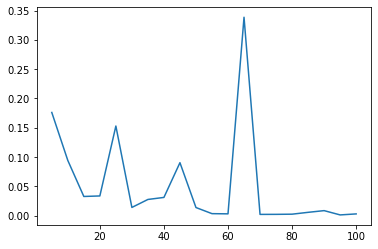

In [80]:
mse_040_test, epochs_040 = mse_vs_epochs(4, prefix='predicted_testdata')

predicted_unseen_6positions_5epochs_0.25coeff.npz 5
predicted_unseen_6positions_10epochs_0.25coeff.npz 10
predicted_unseen_6positions_15epochs_0.25coeff.npz 15
predicted_unseen_6positions_20epochs_0.25coeff.npz 20
predicted_unseen_6positions_25epochs_0.25coeff.npz 25
predicted_unseen_6positions_30epochs_0.25coeff.npz 30
predicted_unseen_6positions_35epochs_0.25coeff.npz 35
predicted_unseen_6positions_40epochs_0.25coeff.npz 40
predicted_unseen_6positions_45epochs_0.25coeff.npz 45
predicted_unseen_6positions_50epochs_0.25coeff.npz 50
predicted_unseen_6positions_55epochs_0.25coeff.npz 55
predicted_unseen_6positions_60epochs_0.25coeff.npz 60
predicted_unseen_6positions_65epochs_0.25coeff.npz 65
predicted_unseen_6positions_70epochs_0.25coeff.npz 70
predicted_unseen_6positions_75epochs_0.25coeff.npz 75
predicted_unseen_6positions_80epochs_0.25coeff.npz 80
predicted_unseen_6positions_85epochs_0.25coeff.npz 85
predicted_unseen_6positions_90epochs_0.25coeff.npz 90
predicted_unseen_6positions_95

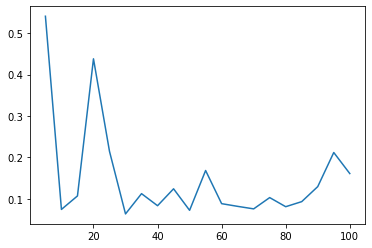

In [81]:
mse_025_unseen, epochs_025 = mse_vs_epochs(25, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.3coeff.npz 5
predicted_unseen_6positions_10epochs_0.3coeff.npz 10
predicted_unseen_6positions_15epochs_0.3coeff.npz 15
predicted_unseen_6positions_20epochs_0.3coeff.npz 20
predicted_unseen_6positions_25epochs_0.3coeff.npz 25
predicted_unseen_6positions_30epochs_0.3coeff.npz 30
predicted_unseen_6positions_35epochs_0.3coeff.npz 35
predicted_unseen_6positions_40epochs_0.3coeff.npz 40
predicted_unseen_6positions_45epochs_0.3coeff.npz 45
predicted_unseen_6positions_50epochs_0.3coeff.npz 50
predicted_unseen_6positions_55epochs_0.3coeff.npz 55
predicted_unseen_6positions_60epochs_0.3coeff.npz 60
predicted_unseen_6positions_65epochs_0.3coeff.npz 65
predicted_unseen_6positions_70epochs_0.3coeff.npz 70
predicted_unseen_6positions_75epochs_0.3coeff.npz 75
predicted_unseen_6positions_80epochs_0.3coeff.npz 80
predicted_unseen_6positions_85epochs_0.3coeff.npz 85
predicted_unseen_6positions_90epochs_0.3coeff.npz 90
predicted_unseen_6positions_95epochs_0.3coeff.np

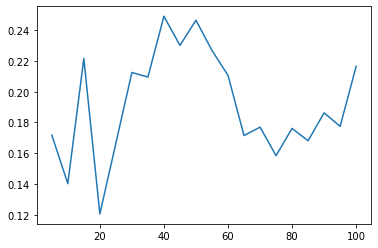

In [82]:
mse_030_unseen, epochs_030 = mse_vs_epochs(3, prefix='predicted_unseen')

predicted_unseen_6positions_5epochs_0.4coeff.npz 5
predicted_unseen_6positions_10epochs_0.4coeff.npz 10
predicted_unseen_6positions_15epochs_0.4coeff.npz 15
predicted_unseen_6positions_20epochs_0.4coeff.npz 20
predicted_unseen_6positions_25epochs_0.4coeff.npz 25
predicted_unseen_6positions_30epochs_0.4coeff.npz 30
predicted_unseen_6positions_35epochs_0.4coeff.npz 35
predicted_unseen_6positions_40epochs_0.4coeff.npz 40
predicted_unseen_6positions_45epochs_0.4coeff.npz 45
predicted_unseen_6positions_50epochs_0.4coeff.npz 50
predicted_unseen_6positions_55epochs_0.4coeff.npz 55
predicted_unseen_6positions_60epochs_0.4coeff.npz 60
predicted_unseen_6positions_65epochs_0.4coeff.npz 65
predicted_unseen_6positions_70epochs_0.4coeff.npz 70
predicted_unseen_6positions_75epochs_0.4coeff.npz 75
predicted_unseen_6positions_80epochs_0.4coeff.npz 80
predicted_unseen_6positions_85epochs_0.4coeff.npz 85
predicted_unseen_6positions_90epochs_0.4coeff.npz 90
predicted_unseen_6positions_95epochs_0.4coeff.np

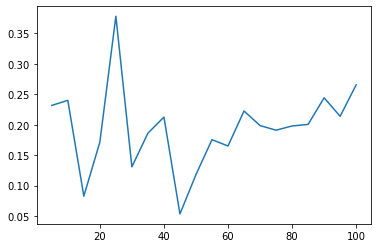

In [83]:
mse_040_unseen, epochs_040 = mse_vs_epochs(4, prefix='predicted_unseen')

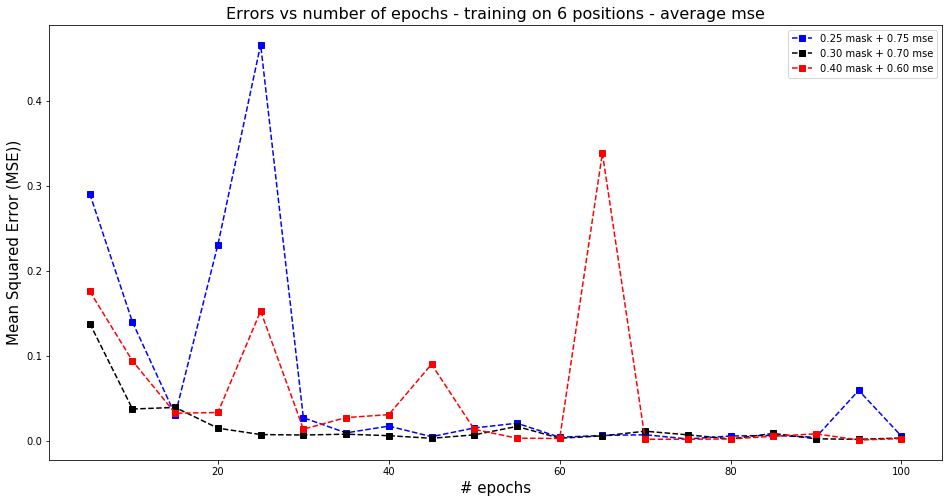

In [84]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_025, mse_025_test, 's--', linewidth=1.5, c='blue',label='0.25 mask + 0.75 mse')
ax1.plot(epochs_030, mse_030_test,'s--', linewidth=1.5, c='k', label='0.30 mask + 0.70 mse')
ax1.plot(epochs_040, mse_040_test, 's--', linewidth=1.5, c='red', label='0.40 mask + 0.60 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

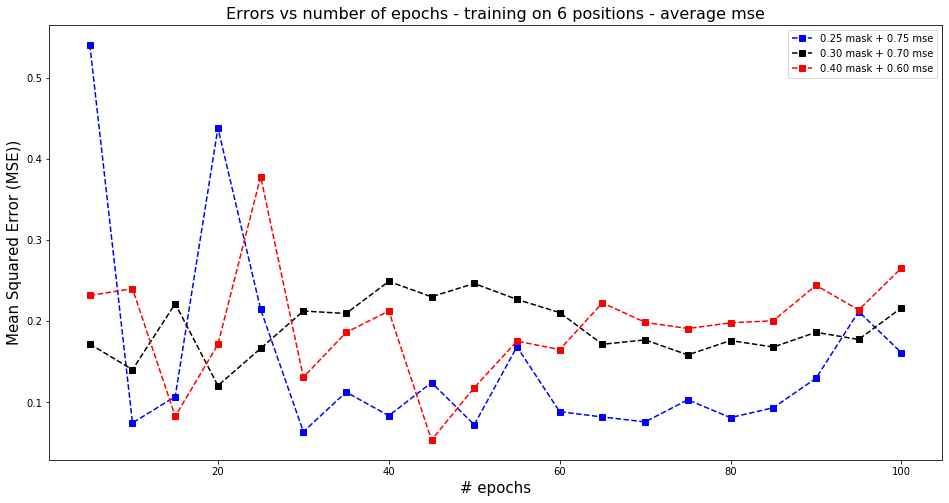

In [85]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs_025, mse_025_unseen, 's--', linewidth=1.5, c='blue',label='0.25 mask + 0.75 mse')
ax1.plot(epochs_030, mse_030_unseen,'s--', linewidth=1.5, c='k', label='0.30 mask + 0.70 mse')
ax1.plot(epochs_040, mse_040_unseen, 's--', linewidth=1.5, c='red', label='0.40 mask + 0.60 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

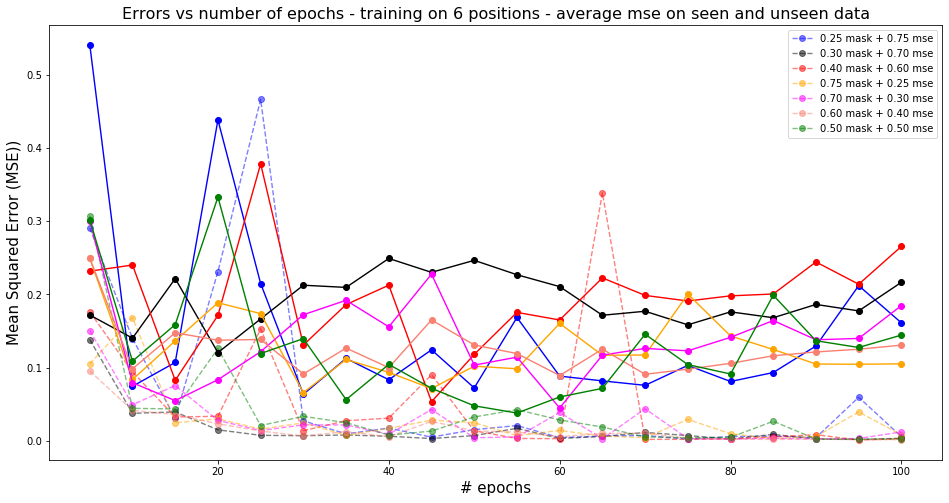

In [86]:
fig1, ax1 = plt.subplots(figsize=(16,8))
marker=6
plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs_025, mse_025_test, 'o--', linewidth=1.4, ms=marker, c='blue',label='0.25 mask + 0.75 mse', alpha=0.5)
ax1.plot(epochs_030, mse_030_test,'o--', linewidth=1.4, ms=marker, c='k', label='0.30 mask + 0.70 mse', alpha=0.5)
ax1.plot(epochs_040, mse_040_test, 'o--', linewidth=1.4, ms=marker, c='red', label='0.40 mask + 0.60 mse', alpha=0.5)
ax1.plot(epochs_075[:20], mse_075_test[:20], 'o--', linewidth=1.4, ms=marker, c='orange',label='0.75 mask + 0.25 mse', alpha=0.5)
ax1.plot(epochs_070[:20], mse_070_test[:20],'o--', linewidth=1.4, ms=marker, c='magenta', label='0.70 mask + 0.30 mse', alpha=0.5)
ax1.plot(epochs_060[:20], mse_060_test[:20], 'o--', linewidth=1.4, ms=marker, c='salmon', label='0.60 mask + 0.40 mse', alpha=0.5)
ax1.plot(epochs_050[:20], mse_050_test[:20], 'o--', linewidth=1.4, ms=marker, c='green', label='0.50 mask + 0.50 mse', alpha=0.5)



ax1.plot(epochs_025, mse_025_unseen, 'o-', linewidth=1.4, ms=marker, c='blue')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_030, mse_030_unseen,'o-', linewidth=1.4, ms=marker, c='k')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_040, mse_040_unseen, 'o-', linewidth=1.4, ms=marker, c='red')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_075[:20], mse_075_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='orange')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs_070[:20], mse_070_unseen[:20],'o-', linewidth=1.4, ms=marker, c='magenta')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs_060[:20], mse_060_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='salmon')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs_050[:20], mse_050_unseen[:20], 'o-', linewidth=1.4, ms=marker, c='green')#, label='0.50 mask + 0.50 mse')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 0.4)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

In [43]:
from functools import partial

In [56]:
def min_deltas(unseen, test, epochs):
    deltalist = [(e, abs(u-t)) for e, u, t in zip(epochs, unseen, test)]
    return deltalist, min(deltalist, key=lambda e: e[1])
    

In [98]:
min_delta_025 = min_deltas(mse_025_unseen, mse_025_test, epochs_025)[1]

In [96]:
min_delta025

(30, 0.03629439043449625)

In [97]:
min_delta_030 = min_deltas(mse_030_unseen, mse_030_test, epochs_030)[1]

In [99]:
min_delta_040 = min_deltas(mse_040_unseen, mse_040_test, epochs_040)[1]

In [100]:
min_delta_050 = min_deltas(mse_050_unseen, mse_050_test, epochs_050)[1]

In [101]:
min_delta_060 = min_deltas(mse_060_unseen, mse_060_test, epochs_060)[1]

In [102]:
min_delta_070 = min_deltas(mse_070_unseen, mse_070_test, epochs_070)[1]

In [103]:
min_delta_075 = min_deltas(mse_075_unseen, mse_075_test, epochs_075)[1]

In [104]:
deltas = [min_delta_025, min_delta_030, min_delta_040, min_delta_050, min_delta_060, min_delta_070, min_delta_075]

In [105]:
min(deltas, key=lambda e: e[1])

(55, 0.004652028720777829)

In [106]:
deltas

[(30, 0.03629439043449625),
 (5, 0.03363622666580465),
 (45, 0.036838834823244876),
 (55, 0.004652028720777829),
 (10, 0.05680520979262156),
 (60, 0.006071654605525473),
 (30, 0.04138057101675611)]